<a href="https://colab.research.google.com/github/Tsung-Hung/dummy-git/blob/master/20230414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

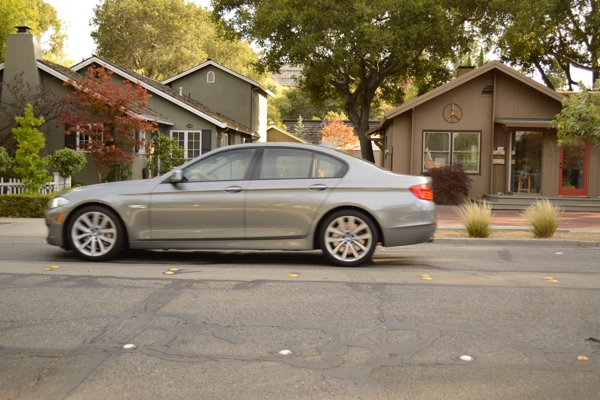

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

# Read RGB image using OpenCV
image = cv2.imread('/content/2014_000307_gt')
# Convert BGR to RGB
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the RGB image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

<ipython-input-5-1ebbf2a980d4>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.ravel(R), cmap="Reds", shade=True, label='R Channel')
<ipython-input-5-1ebbf2a980d4>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.ravel(G), cmap="Greens", shade=True, label='G Channel')
<ipython-input-5-1ebbf2a980d4>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.ravel(B), cmap="Blues", shade=True, label='B Channel')


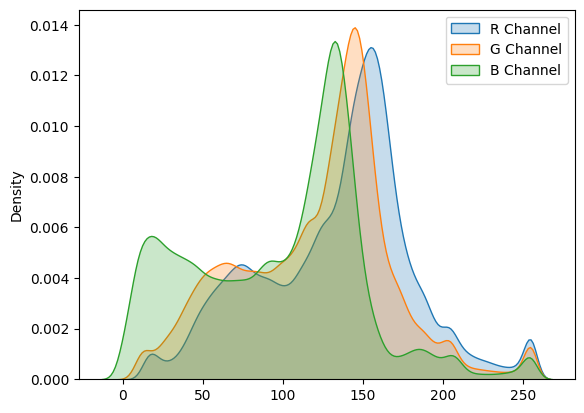

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read RGB image using OpenCV
image = cv2.imread('/content/2014_000307_gt')
# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create density plots for R, G, B channels
# Extract the R, G, and B channels
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]

# Create density plot for R channel
sns.kdeplot(np.ravel(R), cmap="Reds", shade=True, label='R Channel')

# Create density plot for G channel
sns.kdeplot(np.ravel(G), cmap="Greens", shade=True, label='G Channel')

# Create density plot for B channel
sns.kdeplot(np.ravel(B), cmap="Blues", shade=True, label='B Channel')

# Add legend
plt.legend()

# Show the plot
plt.show()

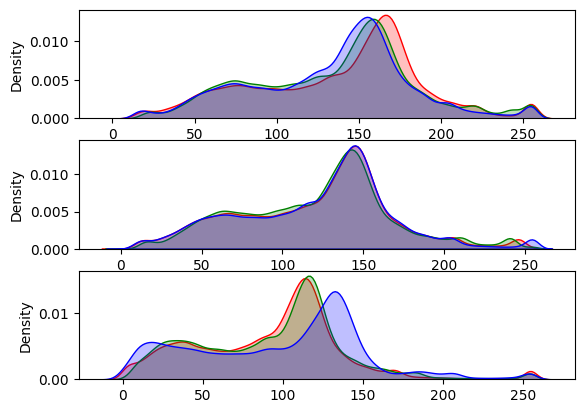

In [128]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read RGB image using OpenCV
image_1 = cv2.imread('/content/2014_000307_original')
# Convert BGR to RGB
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
# Create density plots for R, G, B channels
# Extract the R, G, and B channels
R1 = image_1[:, :, 0]
G1 = image_1[:, :, 1]
B1 = image_1[:, :, 2]


# Read RGB image using OpenCV
image_2 = cv2.imread('/content/2014_000307_finetune')
# Convert BGR to RGB
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
# Create density plots for R, G, B channels
# Extract the R, G, and B channels
R2 = image_2[:, :, 0]
G2 = image_2[:, :, 1]
B2 = image_2[:, :, 2]


# Read RGB image using OpenCV
image_3 = cv2.imread('/content/2014_000307_gt')
# Convert BGR to RGB
image_3 = cv2.cvtColor(image_3, cv2.COLOR_BGR2RGB)
# Create density plots for R, G, B channels
# Extract the R, G, and B channels
R3 = image_3[:, :, 0]
G3 = image_3[:, :, 1]
B3 = image_3[:, :, 2]

fig, axs = plt.subplots(nrows=3)


sns.kdeplot(np.ravel(R1), color="red", fill=True, label='R Channel', ax=axs[0])
sns.kdeplot(np.ravel(G1), color="red", fill=True, label='G Channel', ax=axs[1])
sns.kdeplot(np.ravel(B1), color="red", fill=True, label='B Channel', ax=axs[2])

sns.kdeplot(np.ravel(R2), color="green", fill=True, label='R Channel', ax=axs[0])
sns.kdeplot(np.ravel(G2), color="green", fill=True, label='G Channel', ax=axs[1])
sns.kdeplot(np.ravel(B2), color="green", fill=True, label='B Channel', ax=axs[2])

sns.kdeplot(np.ravel(R3), color="blue", fill=True, label='R Channel', ax=axs[0])
sns.kdeplot(np.ravel(G3), color="blue", fill=True, label='G Channel', ax=axs[1])
sns.kdeplot(np.ravel(B3), color="blue", fill=True, label='B Channel', ax=axs[2])

# Add legend
#plt.legend()
# Show the plot
plt.show()

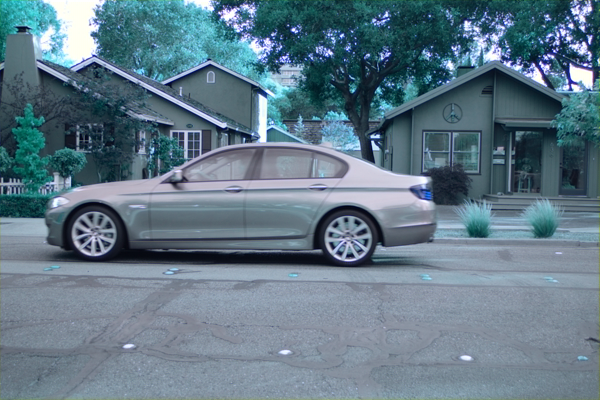

In [129]:
image_combine = np.zeros((400,600,3))
image_combine[:, :, 0] = R2 
image_combine[:, :, 1] = G3
image_combine[:, :, 2] = B3

# Display the RGB image
cv2_imshow(image_combine)
cv2.waitKey(0)
cv2.destroyAllWindows()

image_combine_t = TF.to_tensor(image_combine)

# Color Loss

In [85]:
import torch
import torch.nn as nn
import random

class L1CosineSim(nn.Module):
    '''
    https://github.com/dmarnerides/hdr-expandnet/blob/master/train.py
    Can be used to replace L1 pixel loss, but includes a cosine similarity term
    to ensure color correctness of the RGB vectors of each pixel.
    lambda is a constant factor that adjusts the contribution of the cosine similarity term
    It provides improved color stability, especially for low luminance values, which
    are frequent in HDR images, since slight variations in any of the RGB components of these
    low values do not contribute much totheL1loss, but they may however cause noticeable
    color shifts. More in the paper: https://arxiv.org/pdf/1803.02266.pdf
    '''
    def __init__(self, loss_lambda=5):
        super(L1CosineSim, self).__init__()
        self.similarity = torch.nn.CosineSimilarity(dim=0, eps=1e-20)

    def forward(self, x, y):
        cosine_term = torch.mean(1 - self.similarity(x, y))
        return cosine_term


# random.seed(113)
# input1 = torch.randn(100, 3, 400, 600)
# input2 = torch.randn(100, 3, 400, 600)
# cos = nn.CosineSimilarity(dim=1, eps=1e-6)
# output = cos(input1, input2)
# output.shape

In [130]:
image_combine_t = image_combine_t/255

In [131]:
import torchvision.transforms.functional as TF
image_1t = TF.to_tensor(image_1)
image_2t = TF.to_tensor(image_2)
image_3t = TF.to_tensor(image_3)

loss1 = L1CosineSim()
loss1(image_1t, image_3t)

tensor(0.0076)

# SSIM Loss

In [144]:
image_1p = torch.unsqueeze(image_1t, 0)
image_2p = torch.unsqueeze(image_2t, 0)
image_3p = torch.unsqueeze(image_3t, 0)
image_combine_p = torch.unsqueeze(image_combine_t, 0).to(image_3p.dtype)

In [145]:
from IQA_pytorch import SSIM

ssim = SSIM()
ssim(image_combine_p, image_3p)

tensor(0.0233)

# VGG perceptual Loss

In [146]:
from torchvision.models import vgg16
import torch.nn.functional as F

class LossNetwork(torch.nn.Module):
    '''
    Source: IAT
    '''
    def __init__(self, vgg_model):
        super(LossNetwork, self).__init__()
        self.vgg_layers = vgg_model
        self.layer_name_mapping = {
            '3': "relu1_2",
            '8': "relu2_2",
            '15': "relu3_3"
        }

    def output_features(self, x):
        output = {}
        for name, module in self.vgg_layers._modules.items():
            x = module(x)
            if name in self.layer_name_mapping:
                output[self.layer_name_mapping[name]] = x
        return list(output.values())

    def forward(self, pred_im, gt):
        loss = []
        pred_im_features = self.output_features(pred_im)
        gt_features = self.output_features(gt)
        for pred_im_feature, gt_feature in zip(pred_im_features, gt_features):
            loss.append(F.mse_loss(pred_im_feature, gt_feature))

        return sum(loss)/len(loss)

# Loss & Optimizer Setting & Metric
vgg_model = vgg16(pretrained=True).features[:16]

for param in vgg_model.parameters():
    param.requires_grad = False

loss_network = LossNetwork(vgg_model)
loss_network.eval()
loss_network(image_combine_p, image_3p)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor(0.1336)